In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib import *
import seaborn as sns

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [28]:
np.random.seed(19)

In [29]:
df_2023_Ask = pd.read_csv('XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30 (1).csv')
df_2023_Bid = pd.read_csv('XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30 (1).csv')

In [30]:
print(df_2023_Ask.head(3))
print(df_2023_Ask.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125    0.351
1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141    1.155
2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027    0.882
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712


In [31]:
print(df_2023_Bid.head(3))
print(df_2023_Bid.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746    0.069
35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756    0.216
35219  2023.06.30 20:55:00  22.756  22.766  22.701  22.745    0.327


In [32]:
df_2023 = df_2023_Bid.merge(df_2023_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')

df_2023

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [33]:
# rename columns

df_2023.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [34]:
df_2023.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.351
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.155
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.882


In [35]:
df_2023["Volume_Delta"] = df_2023["Volume_Ask"] - df_2023["Volume_Bid"]
df_2023["Volume_Delta_abs"] = (df_2023["Volume_Ask"] - df_2023["Volume_Bid"]).abs()
df_2023["Open_Delta"] = df_2023["Open_Ask"]  - df_2023["Open_Bid"]
df_2023["High_Delta"] = df_2023["High_Ask"]  - df_2023["High_Bid"]
df_2023["Low_Delta"]  = df_2023["Low_Ask"]   - df_2023["Low_Bid"]
df_2023["Close_Delta"]= df_2023["Close_Ask"] - df_2023["Close_Bid"]

In [36]:
n = df_2023.shape[0]
n

35220

In [37]:
p = df_2023.shape[1]
p

17

In [38]:
df_2023['Y_High_Bid'] = df_2023['High_Bid']
df_2023['Y_Low_Ask'] = df_2023['Low_Bid'] + df_2023['Low_Delta']

In [39]:
data_ax = df_2023.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [40]:
data_ay = df_2023[['Y_High_Bid', 'Y_Low_Ask']]

In [41]:
data_ax.shape

(35220, 17)

In [42]:
data_ay.shape

(35220, 2)

In [43]:
data_ay = data_ay.shift(-1)

In [44]:
data_ay.tail

<bound method NDFrame.tail of        Y_High_Bid  Y_Low_Ask
0          24.130     24.094
1          24.098     24.022
2          23.980     23.986
3          24.024     24.023
4          24.061     24.073
...           ...        ...
35215      22.751     22.775
35216      22.751     22.776
35217      22.761     22.774
35218      22.766     22.786
35219         NaN        NaN

[35220 rows x 2 columns]>

In [45]:
# create new colomns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 5 minutes

# Forward-looking window
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_5'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_5']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

In [46]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
0,24.130,24.094,24.130,23.986
1,24.098,24.022,24.101,23.986
2,23.980,23.986,24.101,23.986
3,24.024,24.023,24.101,24.023
4,24.061,24.073,24.101,24.062
5,24.101,24.090,24.101,24.062


In [47]:
data_ay = data_ay.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [48]:
data_ay

,Y_High_Bid_5,Y_Low_Ask_5
0,24.130,23.986
1,24.101,23.986
2,24.101,23.986
3,24.101,24.023
4,24.101,24.062
...,...,...
35215,NaN,NaN
35216,NaN,NaN
35217,NaN,NaN
35218,NaN,NaN


In [49]:
# delete the 5 last rows in data_ay (because we don't have answers for the last 5 minutes)

for i in range(5):
        data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)


In [50]:
# delete the last 5 rows in data_ax (because we don't have answers for the last 5 minutes)

for i in range(5):
    data_ax.drop(data_ax.shape[0]-1, axis=0, inplace=True)

In [51]:
data_ay.shape

(35215, 2)

In [52]:
data_ax.shape

(35215, 17)

In [53]:
data_ax = data_ax.drop(['Local time'], axis=1)

In [54]:
data_ax

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510,0.0030,0.0030,0.066,0.066,0.066,0.066
1,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550,-0.6908,0.6908,0.030,0.058,0.030,0.049
2,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820,-0.0210,0.0210,0.049,0.050,0.050,0.050
3,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940,0.0000,0.0000,0.049,0.048,0.048,0.048
4,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044,0.0164,0.0164,0.048,0.049,0.047,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35210,22.758,22.760,22.742,22.743,3.7139,22.788,22.790,22.772,22.773,6.3546,2.6407,2.6407,0.030,0.030,0.030,0.030
35211,22.746,22.753,22.738,22.748,1.0326,22.776,22.783,22.768,22.778,2.3477,1.3151,1.3151,0.030,0.030,0.030,0.030
35212,22.742,22.753,22.738,22.748,1.7904,22.772,22.783,22.768,22.778,4.5415,2.7511,2.7511,0.030,0.030,0.030,0.030
35213,22.733,22.747,22.728,22.742,1.9267,22.763,22.777,22.758,22.772,3.4873,1.5606,1.5606,0.030,0.030,0.030,0.030


In [55]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


data_a:
[[ 2.4036e+01  2.4059e+01  2.4017e+01  2.4059e+01  3.4800e-01  2.4102e+01
   2.4125e+01  2.4083e+01  2.4125e+01  3.5100e-01  3.0000e-03  3.0000e-03
   6.6000e-02  6.6000e-02  6.6000e-02  6.6000e-02]
 [ 2.4064e+01  2.4130e+01  2.4064e+01  2.4092e+01  1.8458e+00  2.4094e+01
   2.4188e+01  2.4094e+01  2.4141e+01  1.1550e+00 -6.9080e-01  6.9080e-01
   3.0000e-02  5.8000e-02  3.0000e-02  4.9000e-02]]


[[22.733  22.747  22.728  22.742   1.9267 22.763  22.777  22.758  22.772
   3.4873  1.5606  1.5606  0.03    0.03    0.03    0.03  ]
 [22.742  22.752  22.739  22.752   0.3622 22.772  22.782  22.769  22.782
   1.4552  1.093   1.093   0.03    0.03    0.03    0.03  ]]
numpy size: =  (35215, 16)
type:  float64


In [56]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[24.13  23.986]
 [24.101 23.986]
 [24.101 23.986]]


[[22.752 22.758]
 [22.761 22.769]
 [22.766 22.771]]
numpy size: =  (35215, 2)
type:  float64


In [57]:
n_small = 30000
N = 50

L = n_small - N
t = data_a.shape[1]
print('Size of a three-dimensional tensor: ', L, N, t)

Size of a three-dimensional tensor:  29950 50 16


In [58]:
# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [59]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

Y = np.zeros((L, 2), dtype= 'float32') # We will predict two prices - normalised High_Bid and normalised Low_Ask

In [60]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 

from tqdm import tqdm 
#print('L = n - N = ', n-N, L)
print('L = n_small - N - 5 = ', n_small-N-5, L)
#for k in tqdm(range(L-1)):
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid - max 5 minutes future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask -  min 5 minutes future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


100%|██████████| 29950/29950 [00:00<00:00, 102281.27it/s]

29949
data_b: 
 [[[24.036 24.059 24.017 ...  0.066  0.066  0.066]
  [24.064 24.13  24.064 ...  0.058  0.03   0.049]
  [24.094 24.098 23.972 ...  0.05   0.05   0.05 ]
  ...
  [24.218 24.251 24.212 ...  0.03   0.03   0.03 ]
  [24.234 24.255 24.22  ...  0.026  0.03   0.03 ]
  [24.244 24.35  24.237 ...  0.03   0.03   0.03 ]]

 [[24.064 24.13  24.064 ...  0.058  0.03   0.049]
  [24.094 24.098 23.972 ...  0.05   0.05   0.05 ]
  [23.977 23.98  23.938 ...  0.048  0.048  0.048]
  ...
  [24.234 24.255 24.22  ...  0.026  0.03   0.03 ]
  [24.244 24.35  24.237 ...  0.03   0.03   0.03 ]
  [24.345 24.35  24.309 ...  0.03   0.03   0.03 ]]

 [[24.094 24.098 23.972 ...  0.05   0.05   0.05 ]
  [23.977 23.98  23.938 ...  0.048  0.048  0.048]
  [23.978 24.024 23.976 ...  0.049  0.047  0.05 ]
  ...
  [24.244 24.35  24.237 ...  0.03   0.03   0.03 ]
  [24.345 24.35  24.309 ...  0.03   0.03   0.03 ]
  [24.317 24.35  24.282 ...  0.03   0.03   0.03 ]]

 ...

 [[23.587 23.603 23.573 ...  0.03   0.03   0.03 ]
  [2

In [61]:
# Control of the correctness of filling the array Y 
# (should show MAX of the normalised prices High_Bid and Low_Ask - during 5 next minutes(step) ahead)


import random

pp = random.randint(50, L) # (any number before 29950) - just to look at the middle of data_b
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  17362
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
23.902 		 23.914
23.914 		 23.914
23.914 		 23.913
23.909 		 23.913
23.913 		 23.913
23.913 		 23.903
23.897 		 23.903
23.889 		 23.903
23.898 		 23.903
23.898 		 23.903
23.903 		 23.897
23.897 		 23.897
23.892 		 23.897
23.897 		 23.891
23.891 		 23.877


In [62]:
data = []
data_ax = []
data_ay = []
data_a = []
data_y = []

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, shuffle = False, stratify = None, random_state=101)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26955, 50, 16)
(26955, 2)
(2995, 50, 16)
(2995, 2)


In [66]:
model = keras.Sequential([
    keras.layers.LSTM(100, activation='relu', input_shape=(50, 16)),

    keras.layers.Dense(2)
])

C:\Users\olulo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        46,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,002 (183.60 KB)

 Trainable params: 47,002 (183.60 KB)

 Non-trainable params: 0 (0.00 B)

None


In [68]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [69]:
# Early Stopping parameters

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_LSTM.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [70]:
history = model.fit(X_train, y_train, batch_size=20, epochs=20, validation_split=0.1, shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 763894.0625 - mae: 442.9614
Epoch 1: val_loss improved from inf to 76985.59375, saving model to best_model_LSTM.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 46s 33ms/step - loss: 763905.8125 - mae: 442.9629 - val_loss: 76985.5938 - val_mae: 144.1917
Epoch 2/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 360735.7812 - mae: 232.6826
Epoch 2: val_loss improved from 76985.59375 to 37477.60156, saving model to best_model_LSTM.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - loss: 360915.4375 - mae: 232.6807 - val_loss: 37477.6016 - val_mae: 127.5279
Epoch 3/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 387041.0312 - mae: 275.4395
Epoch 3: val_loss improved from 37477.60156 to 20061.05469, saving model to best_model_LSTM.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - loss: 386905.8438 - mae: 275.3765 - val_loss: 20061.0547 - val_mae: 74.6452
Epoch 4/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1406833

In [71]:
LSTM_saved_best_model = keras.models.load_model('best_model_LSTM.keras')

In [72]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 649.9487 - mae: 21.5167


In [73]:
scores

[653.2314453125, 21.570571899414062]

In [74]:
print("Mean squared error (mse): %.9f " % (scores[0]))

Mean squared error (mse): 653.231445312 


In [75]:
print("Mean absolute error (mae): %.9f " % (scores[1]))

Mean absolute error (mae): 21.570571899 


Text(0.5, 0, 'Mean Squared Error')

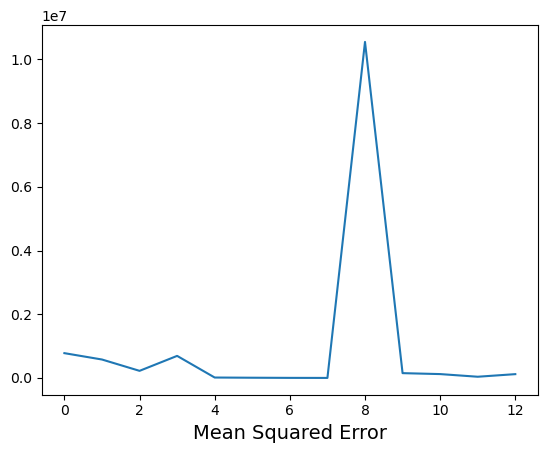

In [76]:
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error', size=14)

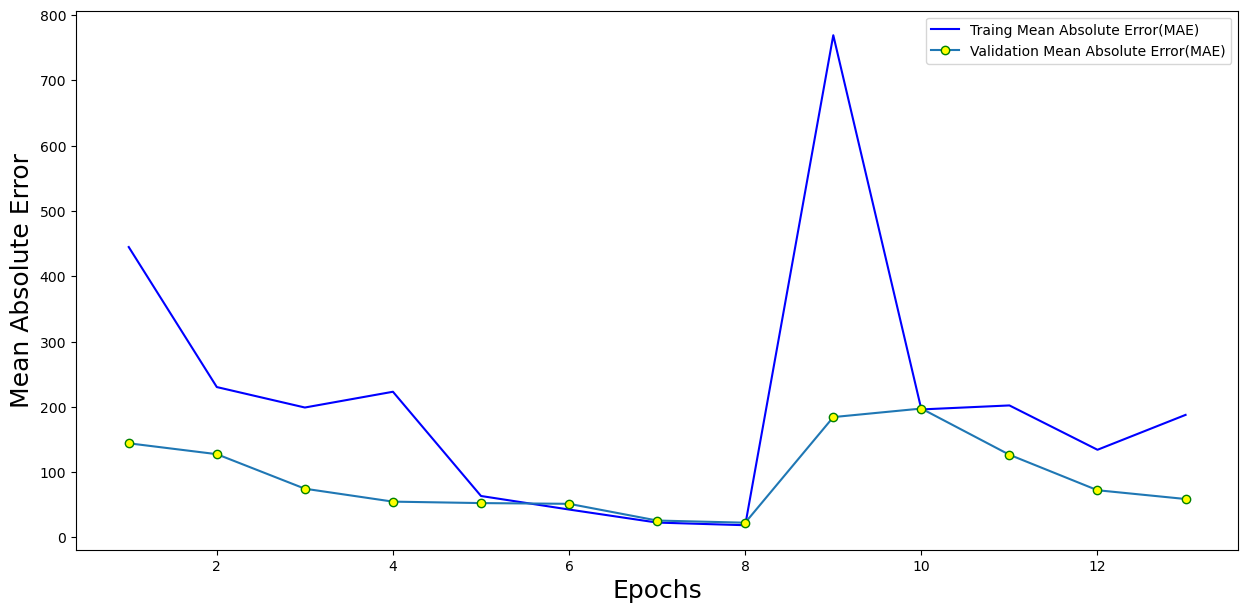

In [77]:
history_dict = history.history

training_mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(training_mae_values) + 1)
plt.figure(num=1, figsize=(15, 7))
plt.plot(epochs, training_mae_values, 'b', label = 'Traing Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error', size=18)
plt.legend()
plt.show()